<a href="https://colab.research.google.com/github/HenrryCordovillo/Redes_Neuronales_con_Python/blob/main/Redes%20Neuronales%20con%20Archivos%20CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importaciones

In [43]:
#Libreria para analisis de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#Librerias para Redes Neuronales
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
dataframe=pd.read_csv("kc_house_data.csv")

In [5]:
dataframe.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [6]:
dataframe.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
dataframe.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [8]:
#para ver si hay datos nulos en mi archivo .csv
dataframe.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#informacion de todo el .csv
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
#lo que hace esto es agarrar cada una de las variables contarlas, sacar la desviacion estandar, la media, el minimo, y saca los 3 percentiles y el maximo
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


Person
Person es un coeficiente de coorelacion el cual mide entre -1 y 1 donde 1 es la perfeccion de coorelacion que existe entre una variable y otra variable cuando es -1 es lo contrario no tiene coorelacion si no tiene una relacion inversa

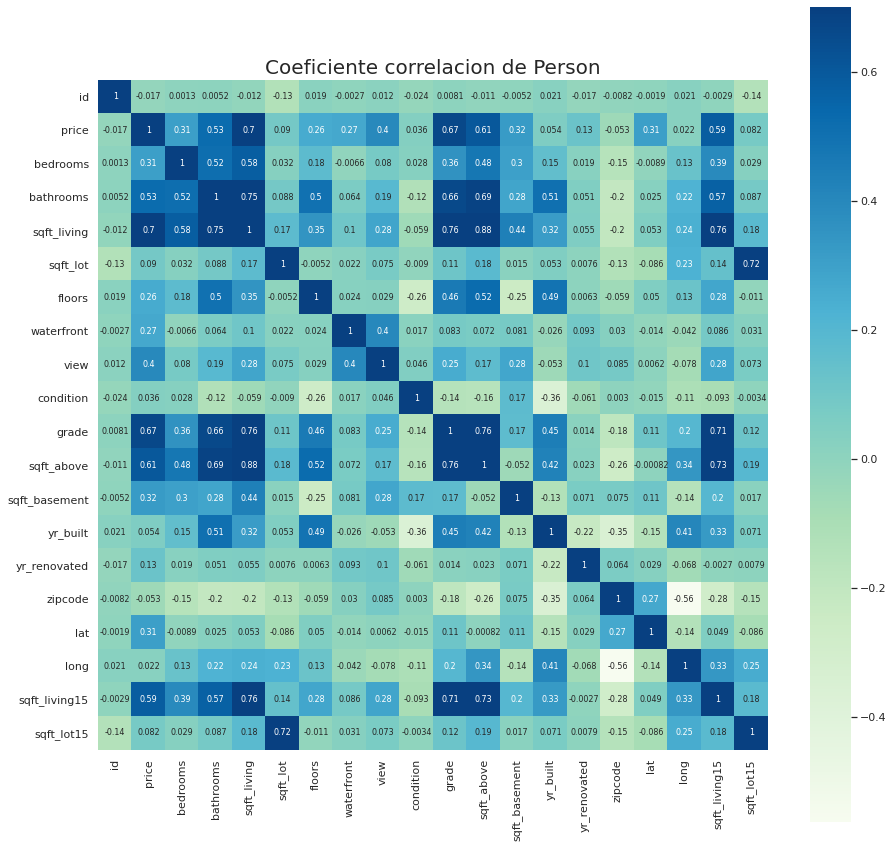

In [11]:
sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Coeficiente correlacion de Person', fontsize = 20)
sns.heatmap(dataframe.corr(),vmax=0.7,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={"size":8})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


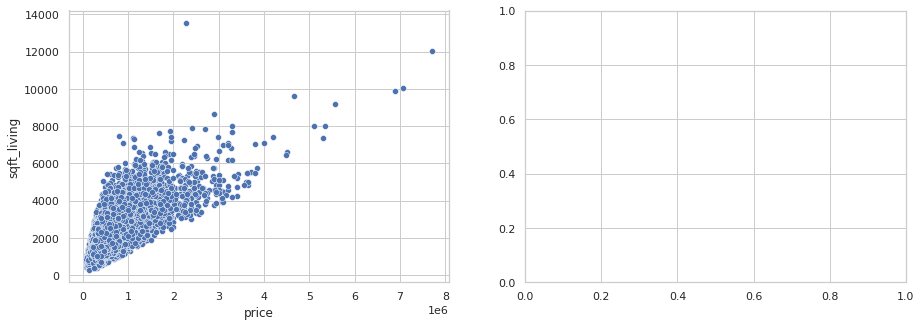

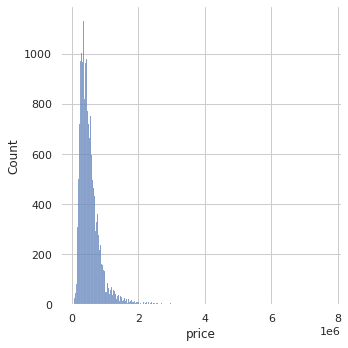

In [12]:
#Ver los datos con graficos precio respecto al sqft_living
f,axes= plt.subplots(1,2,figsize=(15,5))
sns.displot(dataframe['price'],ax=axes[1])
sns.scatterplot(x='price',y='sqft_living',data= dataframe,ax=axes[0])
sns.despine(bottom=True,left=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


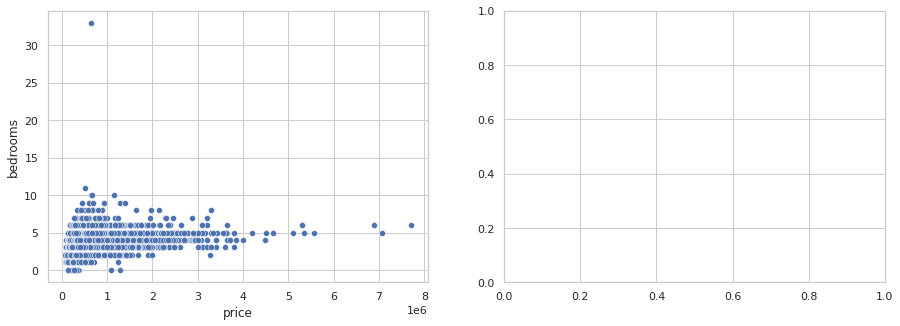

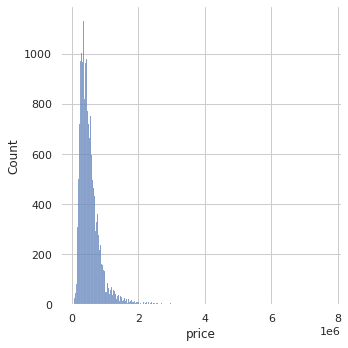

In [13]:
#Ver los datos con graficos precio respecto al las habitaciones
f,axes= plt.subplots(1,2,figsize=(15,5))
sns.displot(dataframe['price'],ax=axes[1])
sns.scatterplot(x='price',y='bedrooms',data= dataframe,ax=axes[0])
sns.despine(bottom=True,left=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


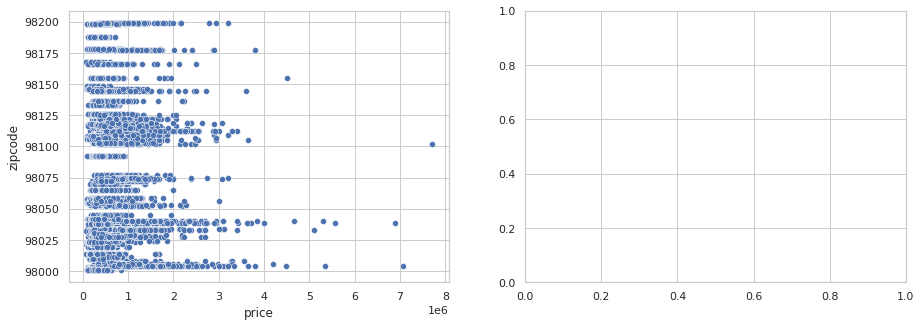

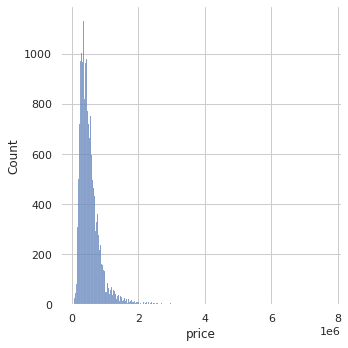

In [14]:
#Ver los datos con graficos precio respecto al zipcode
f,axes= plt.subplots(1,2,figsize=(15,5))
sns.displot(dataframe['price'],ax=axes[1])
sns.scatterplot(x='price',y='zipcode',data= dataframe,ax=axes[0])
sns.despine(bottom=True,left=True)

In [15]:
dataframe = dataframe.drop('id',axis=1)
dataframe = dataframe.drop('zipcode',axis=1)

In [16]:
dataframe['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [17]:
dataframe['date']=pd.to_datetime(dataframe['date'])
dataframe['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [18]:
dataframe['month']= dataframe['date'].apply(lambda date:date.month)
dataframe['year']= dataframe['date'].apply(lambda date:date.year)
dataframe=dataframe.drop('date',axis=1)

In [19]:
dataframe.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3637978198>,
      dtype=object)

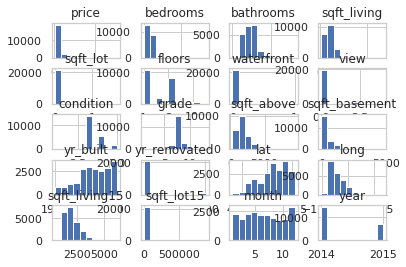

In [20]:
dataframe.hist()

In [21]:
X=dataframe.drop('price',axis=1)
y=dataframe['price']

In [22]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,5,2014
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2,2015
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,6,2014
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,1,2015


In [23]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [24]:
#vamos a separar los datos de entrenamiento y de prueba
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

In [25]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
9634,3,1.00,960,4560,1.0,0,0,4,7,960,0,1968,0,47.5539,-122.365,970,4800,2,2015
7209,4,2.50,2100,10750,1.0,0,2,4,8,2100,0,1967,0,47.3338,-122.337,2310,10425,12,2014
11494,3,1.75,1920,4000,1.0,0,0,3,7,1070,850,1950,0,47.6392,-122.318,2280,4000,9,2014
8340,3,1.00,960,5030,1.0,0,0,3,7,960,0,1955,0,47.5611,-122.280,1460,5400,9,2014
20586,2,2.50,1680,1240,2.0,0,0,3,8,1120,560,2014,0,47.6372,-122.324,2060,3630,11,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,3,2.25,2820,11625,2.0,0,0,3,8,2820,0,1986,0,47.2621,-122.218,2290,8488,7,2014
3915,3,2.25,1670,9500,1.0,0,0,3,7,1170,500,1977,0,47.7253,-122.309,1470,9500,8,2014
14729,3,2.50,2480,9041,2.0,0,0,3,7,2480,0,2004,0,47.6797,-122.035,2480,6500,5,2014
4367,4,1.75,2150,9148,1.0,0,0,4,7,2150,0,1955,0,47.5828,-122.197,2370,9148,11,2014


In [27]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
2212,4,2.00,1660,12377,1.0,0,0,3,8,1660,0,1966,0,47.6231,-122.102,1820,8968,3,2015
16859,3,1.50,1420,9081,1.0,0,0,4,6,1420,0,1990,0,47.1948,-121.999,1090,8410,11,2014
21053,3,2.50,2700,5764,2.0,0,0,3,9,2700,0,2014,0,47.5618,-122.027,3270,14700,4,2015
7757,3,1.50,1630,9282,1.0,0,0,4,7,1630,0,1963,0,47.2021,-122.002,1420,9282,12,2014
12278,3,2.00,2440,13250,1.0,0,0,4,8,1440,1000,1977,0,47.3750,-122.227,2400,10650,7,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10247,3,2.50,2000,9669,2.0,0,0,4,8,2000,0,1992,0,47.1964,-122.009,1930,9202,11,2014
14515,2,1.00,1270,3200,1.0,0,0,4,7,960,310,1920,0,47.6565,-122.348,1410,1320,5,2014
15780,4,3.25,2290,4785,2.0,0,0,3,9,2290,0,2007,0,47.3833,-122.037,2290,4785,10,2014
14762,3,2.50,3150,21893,2.0,0,0,3,9,3150,0,2006,0,47.6455,-121.901,2280,21886,8,2014


In [29]:
y_train

9634     290000.0
7209     352500.0
11494    615000.0
8340     235000.0
20586    653500.0
           ...   
1607     336000.0
3915     425000.0
14729    620000.0
4367     800000.0
15715    751000.0
Name: price, Length: 15129, dtype: float64

In [30]:
y_test

2212     550000.0
16859    202000.0
21053    775900.0
7757     224950.0
12278    312000.0
           ...   
10247    324360.0
14515    355000.0
15780    359950.0
14762    530000.0
18083    770000.0
Name: price, Length: 6484, dtype: float64

In [31]:
#Escalar el modelo
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [32]:
X_train.max()

1.0

In [33]:
X_train.min()

0.0

In [38]:
#Programacion de la Red Neuronal
model = Sequential()
#Capa de Entrada
model.add(Dense(19,activation='relu'))
#Capas ocultas
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation='relu'))
#Capa de salida
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')


In [39]:
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=150,epochs=200,verbose=1)

Epoch 1/200
101/101 [==============================] - 1s 4ms/step - loss: 437311467439.6863 - val_loss: 423832059904.0000
Epoch 2/200
101/101 [==============================] - 0s 2ms/step - loss: 417937764914.1961 - val_loss: 423787495424.0000
Epoch 3/200
101/101 [==============================] - 0s 2ms/step - loss: 437062961031.5294 - val_loss: 423538982912.0000
Epoch 4/200
101/101 [==============================] - 0s 2ms/step - loss: 453961523360.6274 - val_loss: 422803472384.0000
Epoch 5/200
101/101 [==============================] - 0s 3ms/step - loss: 430507751865.7255 - val_loss: 421192892416.0000
Epoch 6/200
101/101 [==============================] - 0s 2ms/step - loss: 430656145287.5294 - val_loss: 418263400448.0000
Epoch 7/200
101/101 [==============================] - 0s 2ms/step - loss: 419017751933.4902 - val_loss: 413538222080.0000
Epoch 8/200
101/101 [==============================] - 0s 2ms/step - loss: 432151093408.6274 - val_loss: 406530981888.0000
Epoch 9/200
101/

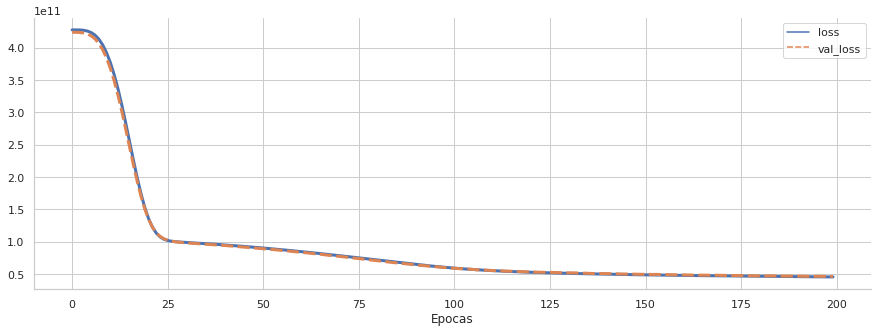

In [41]:
#Grafico de perdida (loss)
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
plt.xlabel('Epocas')
plt.ylabel('')
sns.despine()

In [46]:
prediccion = model.predict(X_test)
print('MAE',mean_absolute_error(y_test,prediccion))
print('VR',explained_variance_score(y_test,prediccion))

MAE 130872.92587852757
VR 0.6670668043177741


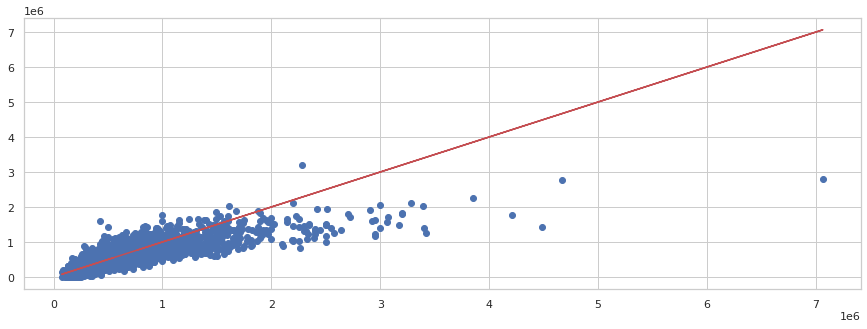

In [47]:
f,axes = plt.subplots(1,figsize=(15,5))
plt.scatter(y_test,prediccion)
plt.plot(y_test,y_test,'r')

In [54]:
print('Precio Real', dataframe.iloc[0]['price'])
casa = dataframe.drop('price',axis=1).iloc[0]
print(casa)
print('Precio predicho',model.predict(scaler.transform(casa.values.reshape(-1,19)))[0,0])

Precio Real 221900.0
bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64
Precio predicho 185190.03
